# 深度學習模型進行『風格轉換』(Style Transfer)

![Style Transfer](https://ithelp.ithome.com.tw/upload/images/20171208/20001976DytMaXo2O0.png) 

* 內容圖片稱為Content Image(C)
* 風格圖片稱為Style Image(S)
* 合成圖片稱為Generated Image (G)

## Step 1: 設定(Setup)


### Import and configure modules

In [ ]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

## Step 2: 輸入秀圖的函數( Functions for visualizing the input)

Define a function to load an image and limit its maximum dimension to 512 pixels.

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

Create a simple function to display an image:

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

## Step 3: 從TF-Hub讀入風格轉換的深度學習模型(Load a DL model of Style Transfer using TF-Hub)

This tutorial demonstrates the original style-transfer algorithm, which optimizes the image content to a particular style. Before getting into the details, let's see how the [TensorFlow Hub model](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) does this:

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Step 4:  選擇內容圖片( Selecting one of content images)
![News 1](https://www.asia.edu.tw/upload/news/2021/03/20/2021032022.jpg) 
![News 2](https://www.asia.edu.tw/upload/news/2021/03/2021032512.jpg) 
![News 3](https://www.asia.edu.tw/upload/news/2021/02/17/2021021724.jpg) 



## tf.keras.utils.get_file
https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file

```
tf.keras.utils.get_file(
    fname, origin, untar=False, md5_hash=None, file_hash=None,
    cache_subdir='datasets', hash_algorithm='auto',
    extract=False, archive_format='auto', cache_dir=None
)
```

In [ ]:
#https://www.asia.edu.tw/upload/news/2021/03/20/2021032022.jpg
#https://www.asia.edu.tw/upload/news/2021/03/2021032512.jpg
#https://www.asia.edu.tw/upload/news/2021/02/17/2021021724.jpg
content_path = tf.keras.utils.get_file('pic1.jpg', 'https://www.asia.edu.tw/upload/news/2021/03/20/2021032022.jpg')


221184/221050 [==============================] - 0s 2us/step


## Step 5: 選擇風格圖片(Selecting one of style images)
![Style 1](https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg) 
![Style 2](https://cdn.britannica.com/66/133466-050-694792D2/Bouquet-Flowers-oil-Vase-canvas-Vincent-van.jpg) 
![Style 3](https://cdn.britannica.com/47/134047-050-EE6B3151/Landscape-oil-canvas-Saint-Remy-Vincent-van-Gogh-1889.jpg) 

更多....
https://www.britannica.com/biography/Vincent-van-Gogh

In [ ]:
#https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg
#https://cdn.britannica.com/66/133466-050-694792D2/Bouquet-Flowers-oil-Vase-canvas-Vincent-van.jpg
#https://cdn.britannica.com/47/134047-050-EE6B3151/Landscape-oil-canvas-Saint-Remy-Vincent-van-Gogh-1889.jpg

style_path = tf.keras.utils.get_file('pic2.jpg', 'https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg')

884736/884624 [==============================] - 0s 0us/step


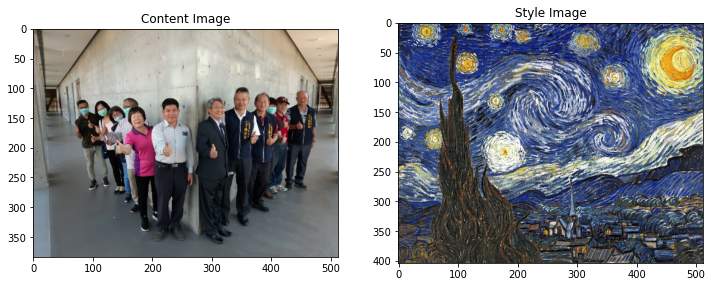

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

## Step 6: 產生風格轉換的影像 (Generate style-transfered images)

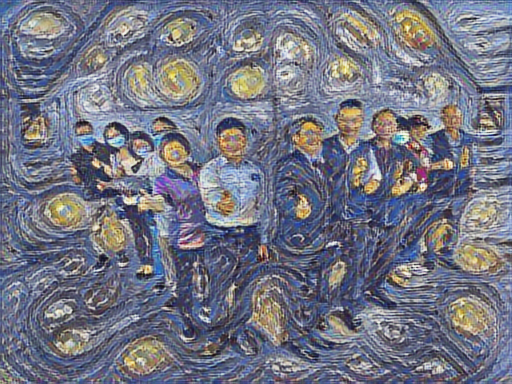

In [ ]:
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)